<a href="https://colab.research.google.com/github/subha-v/FatimaFellowshipProjectPublic/blob/main/FakeNewsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we will import the necessary packages for the project.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Here we will import the datasets into the project.

In [4]:
fakenews = pd.read_csv('/content/Fake.csv')
truenews = pd.read_csv('/content/True.csv')

# New Section

We're looking at the datasets to get a general idea of how they are formatted

In [5]:
fakenews.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


We are combining both the datasets into one dataset and also adding a column regarding whether the news is true or fake

In [6]:
fakenews['temp']= 0
truenews['temp']= 1

combined_dataset = pd.DataFrame()
combined_dataset = truenews.append(fakenews)

Taking a look at the new dataset

In [7]:
combined_dataset

,title,text,subject,date,temp
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


We don't need the columns of date and subject for right now

In [8]:
column = ['date','subject']
combined_dataset = combined_dataset.drop(columns=column)

We can combine the title of the article with the body text and drop the title as well

In [9]:
combined_dataset["text"] = combined_dataset["text"]+" "+ combined_dataset["title"]

In [10]:
combined_dataset = combined_dataset.drop(columns="title")

In [11]:
# Checking our data

In [12]:
combined_dataset.iloc[30689].to_numpy()

array(['The DOJ is reporting that they basically took American taxpayer dollars and started a bonfire with it In light of the fact that key investigators are severely compromised, this case is just a witch hunt that s gone off the rails. A few key details about the fired anti-Trump investigator who wasn t fired but moved to Human Resources by Comey:Peter Strzok sent anti-Trump messages to his  girlfriend   aka mistress then was just moved to HR. He s a part of the Comey/McCabe group. He handled the Fake Trump Dossier inside the FBI alongside McCabe. He was hand-picked by Comey to run the Hillary e-mail investigation. He was also hand-picked by Mueller for the senior investigative staff. Coincidences like this simply don t exist .BURNING YOUR HARD-EARNED DOLLARS:The Department of Justice revealed on Tuesday that nearly $7 million has been spent so far on the investigation into Russian meddling in the 2016 presidential election.The costs cover a five-month period from May 17, when the De

Processing the data using NLTK Package

In [13]:
# now we will process the data using NLTK
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Importing other useful functions

In [14]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem.snowball import SnowballStemmer
st = SnowballStemmer('english')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

Here are all the functions we will be using to clean the data before running the model on it

In [15]:
def remove_punctuation(text):  
    return re.sub(r'[^\w\s]','', str(text))             
                  
def remove_stopwords(text):  #Removing stopwords(eg. this, that, am, be etc)
    stop = stopwords.words("english")
    final_text = []
    for i in str(text).split():
        if i.strip() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
                          
                  
def lemmatization(text):  #Applying Lemaatization 
    wordnet_lemmatizer = WordNetLemmatizer()
    return wordnet_lemmatizer.lemmatize(str(text))

# make function to remove links

In [16]:
  >>> import nltk
  >>> nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Actually cleaning the dataset

In [17]:
def clean_text(text):
    # text =  remove_stopwords(text)
    return lemmatization(text)

combined_dataset['text'] = combined_dataset['text'].apply(lambda x: clean_text(x))
# applying the clean_text to each row in the dataframe using lambda

In [18]:
combined_dataset.iloc[30689].to_numpy()

array(['The DOJ is reporting that they basically took American taxpayer dollars and started a bonfire with it In light of the fact that key investigators are severely compromised, this case is just a witch hunt that s gone off the rails. A few key details about the fired anti-Trump investigator who wasn t fired but moved to Human Resources by Comey:Peter Strzok sent anti-Trump messages to his  girlfriend   aka mistress then was just moved to HR. He s a part of the Comey/McCabe group. He handled the Fake Trump Dossier inside the FBI alongside McCabe. He was hand-picked by Comey to run the Hillary e-mail investigation. He was also hand-picked by Mueller for the senior investigative staff. Coincidences like this simply don t exist .BURNING YOUR HARD-EARNED DOLLARS:The Department of Justice revealed on Tuesday that nearly $7 million has been spent so far on the investigation into Russian meddling in the 2016 presidential election.The costs cover a five-month period from May 17, when the De

In [19]:
all_text = combined_dataset['text']

This is an example of getting a specific line of text in the total text

In [32]:
all_text[780].to_numpy()

array(["SEOUL (Reuters) - South Korean President Moon Jae-in had initially suggested on Tuesday that U.S. President Donald Trump make a visit to the demilitarized zone (DMZ) between North and South Korea, a Blue House official told reporters on Wednesday. Trump had told Moon he had been considering such a trip, and Moon said he would accompany Trump should the U.S. president decide to visit the DMZ, the official said. The U.S. president aborted a surprise visit to the DMZ on Wednesday morning due to fog after two attempts.  South Korea's Moon first suggested Trump visit DMZ: Blue House official",
       "Michelle Obama really did it this time. The former First Lady managed to infuriate conservatives by doing some so terrible that they were forced to use words like  ghetto  and  trash  and  ape  to describe her (you know, their go-to language whenever a person with skin darker than a piece of classroom chalk is involved).What did she do that was so terrible? She went to Beyonce s birthd

This creates a vector of all of the unique words and their relative frequencies amongst all of the texts by using SciKitLearn. 

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
all_text = cv.fit_transform(all_text)

Here we are printing the array

In [35]:
cv.get_feature_names_out()

array(['00', '000', '0000', ..., 'émigré', 'état', 'žižek'], dtype=object)

Here we are looking at a specific row in the array, as we can see, it's a very sparse matrix



In [36]:
all_text[0,:].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

Here we are creating an array containing the prediction values, true or false

In [21]:
truth_or_false = combined_dataset['temp']

Here we are using the sklearn package to split the dataframe into training and testing sets

In [38]:
from keras.preprocessing import sequence, text
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(all_text, truth_or_false, 
                                                  random_state=42, 
                                                  test_size=0.15, shuffle=True)

Fitting a logistic classification model to your data, not a regression model

In [46]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(xtrain,ytrain)
predictions2 = LR.predict(xvalid)

In [55]:
yvalidnumpy = yvalid.to_numpy()

In [50]:
predictions2

array([0, 0, 0, ..., 1, 0, 1])

In [58]:
wrongly_classified = []
for i in range (0,len(predictions2)):
  if(predictions2[i]!=yvalidnumpy[i]):
    wrongly_classified.append(combined_dataset["text"][i])

In [ ]:
wrongly_classified

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(yvalid,predictions2))
print('\n')
print(classification_report(yvalid,predictions2))

[[3516   10]
 [  11 3198]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3526
           1       1.00      1.00      1.00      3209

    accuracy                           1.00      6735
   macro avg       1.00      1.00      1.00      6735
weighted avg       1.00      1.00      1.00      6735



In [48]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(xtrain, ytrain)
predictions = nb.predict(xvalid)

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(yvalid,predictions))
print('\n')
print(classification_report(yvalid,predictions))

[[3374  152]
 [ 141 3068]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3526
           1       0.95      0.96      0.95      3209

    accuracy                           0.96      6735
   macro avg       0.96      0.96      0.96      6735
weighted avg       0.96      0.96      0.96      6735



In [60]:
import pickle

In [61]:
filename = 'finalized_model.sav'

In [62]:
pickle.dump(nb, open(filename, 'wb'))

In [64]:
import matplotlib.pyplot as plt

In [74]:
from sklearn.metrics import roc_curve, auc
logistic_fpr, logistic_tpr, threshold = roc_curve(yvalid, predictions2)
auc_logistic = auc(logistic_fpr, logistic_tpr)


naive_fpr, naive_tpr, threshold = roc_curve(yvalid, predictions)
auc_naive = auc(naive_fpr, naive_tpr)

In [72]:
auc_logistic

0.9564763700786943

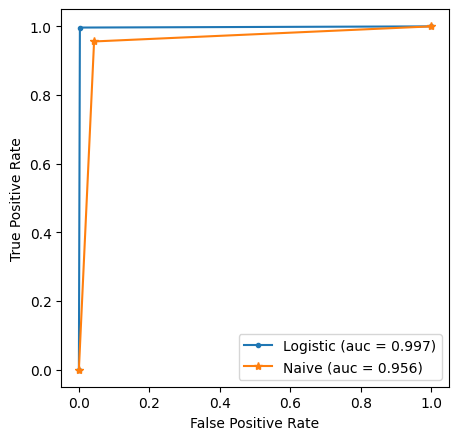

In [81]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker = '.', label= "Logistic" % auc_logistic)
plt.plot(naive_fpr, naive_tpr, marker = '*', label= "Naive" % auc_naive)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()